In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop Cabin column (too many missing)
df.drop(columns=['Cabin'], inplace=True)

# Fill Embarked with mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Confirm no more nulls
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [13]:
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [14]:
print(df['Sex'].unique())       # Should be [0, 1]
print(df['Embarked'].unique())  # Should be [0, 1, 2]


[0 1]
[2 0 1]


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Choose the columns to scale
columns_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [16]:
df[columns_to_scale].describe()


,Age,Fare,SibSp,Parch
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18,4.386066e-17,5.382900e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01,-4.745452e-01,-4.736736e-01
25%,-5.657365e-01,-4.891482e-01,-4.745452e-01,-4.736736e-01
50%,-1.046374e-01,-3.573909e-01,-4.745452e-01,-4.736736e-01
75%,4.333115e-01,-2.424635e-02,4.327934e-01,-4.736736e-01
max,3.891554e+00,9.667167e+00,6.784163e+00,6.974147e+00


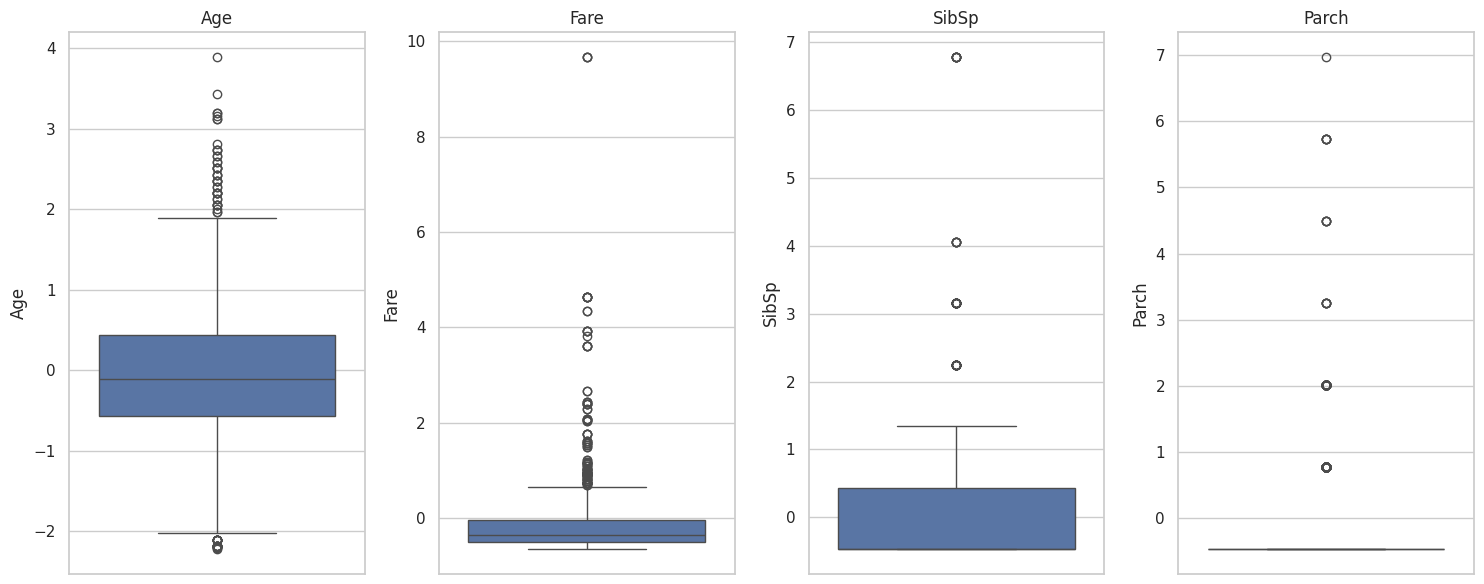

In [19]:
# List of numerical columns to check
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot boxplots for each column
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [20]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply it to selected columns
for col in ['Age', 'Fare']:
    df = remove_outliers_iqr(df, col)

# Check shape after removing
print("After removing outliers:", df.shape)

After removing outliers: (718, 11)


In [21]:
# Separate features and target
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])  # drop unnecessary
y = df['Survived']


In [22]:
print(X.head())
print(y.head())
print("X shape:", X.shape)
print("y shape:", y.shape)

   Pclass  Sex       Age     SibSp     Parch      Fare  Embarked
0       3    0 -0.565736  0.432793 -0.473674 -0.502445         2
2       3    1 -0.258337 -0.474545 -0.473674 -0.488854         2
3       1    1  0.433312  0.432793 -0.473674  0.420730         2
4       3    0  0.433312 -0.474545 -0.473674 -0.486337         2
5       3    0 -0.104637 -0.474545 -0.473674 -0.478116         1
0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64
X shape: (718, 7)
y shape: (718,)


In [24]:
# Merge X and y again for saving cleaned dataset
final_df = pd.concat([X, y], axis=1)
final_df.to_csv('cleaned_titanic.csv', index=False)

# For Google Colab download
from google.colab import files
files.download('cleaned_titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>